# Problem 1: Statistics, part 1

Below is a collection of exercises that you should now be able to complete after week  7.



In [1]:
# the following code guarantees you'll properly reload any modules that you custom-defined in your environment.
# you don't need to understand it.
# just run this once at the beginning.
# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy as np
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from mal_util import *
mal_fpath = os.path.join('csvs', 'myAnimeListDataset [07-05-2018].csv')
anime_headers, anime_studios, anime_sources, anime_dict = load_mal(mal_fpath)
anime_arr, anime_np_lookup = anime_array(anime_dict,  anime_studios, anime_sources) # convert into numpy array

print(anime_headers) # things
print('studios:', len(anime_studios), anime_studios[:10])
print(anime_sources)
print('example entry for Houseki no Kuni', anime_dict['Houseki no Kuni']) # ditionary format
np.set_printoptions(suppress=True) # remove scientific notation view
print(anime_np_lookup[0], anime_arr[0,:]) # np array format

['Anime ID', 'Season', 'Episodes', 'Studio', 'Source', 'Score', '# Ratings', '# Favorites']
studios: 301 ['10Gauge', '33 Collective', '3xCube', '8bit', 'A-1 Pictures', 'A-Real', 'A.C.G.T.', 'ACC Production', 'AIC', 'AIC A.S.T.A.']
['4-koma manga', 'Book', 'Card game', 'Digital manga', 'Game', 'Light novel', 'Manga', 'Music', 'Novel', 'Original', 'Other', 'Picture book', 'Radio', 'Unknown', 'Visual novel', 'Web manga']
example entry for Houseki no Kuni [35557, 2017, 3, 12, 'Orange', '', 'Manga', 8.48, 51444, 127924]
Cowboy Bebop [     1.     1998.        1.       26.      248.       -1.        9.
      8.81 363889.   704490.  ]


## Exercise 1: Graphing sample means

Graph the distribution of 5000 sample means (sample size = 10) of the MAL ratings from a season of your choice.

Text(0.5,1,'Sample means of Winter 2016')

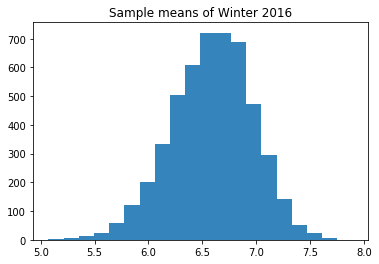

In [39]:
# your code here

# print(np.shape(anime_arr))
# year = 2016
# choice_year = anime_arr[:,YEAR] == year
# choice_season = anime_arr[:,SEASON] == 1
# anime_season = anime_arr[choice_season & choice_year]
# print(anime_season)

def anime_seasonal_rating_sampler(sample_size, num_samples, year, season):
    choice_year = anime_arr[:,YEAR] == year
    choice_season = anime_arr[:,SEASON] == season
    anime_season = anime_arr[choice_season & choice_year]
    sample_array = np.zeros((num_samples, 1))
    number_elements = anime_season.shape[0]
    for i in range(num_samples):
        inds = np.random.randint(number_elements, size = sample_size)
        sample = anime_season[inds,SCORE]
        sample_array[i,:] = (np.average(sample))
    return np.array(sample_array)

sample_size, num_samples, year, season = 10, 5000, 2016, 1
#season = ('Winter 2018')
sample_array = anime_seasonal_rating_sampler(sample_size, num_samples, year, season)

fig = plt.figure()
ax = plt.gca()
ax.hist(sample_array[:,0], bins = 20, alpha = 0.9)
ax.set_title('Sample means of Winter 2016')

## Exercise 2: Plotting histograms

Choose three different studios and sample 10 anime from each. Graph a histogram of the average score per studio and include error bars.

((6.581999999999999, 2.225141793234759, 0.7417139310782531), (6.767, 1.004848744836754, 0.3349495816122513), (6.9030000000000005, 1.2922310164982111, 0.43074367216607035))


Text(0.5,1,'Average score with error bars')

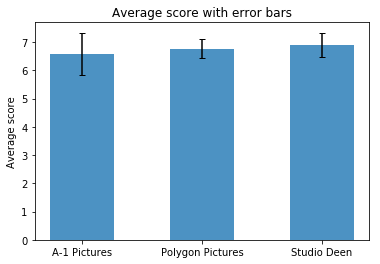

In [21]:
# your code here
from scipy import stats

studio1, studio2, studio3 = 'A-1 Pictures', 'Polygon Pictures', "Studio Deen"
num_studios = 3
studio1_anime = anime_arr[anime_arr[:,STUDIO] == anime_studios.index(studio1),:]
studio2_anime = anime_arr[anime_arr[:,STUDIO] == anime_studios.index(studio2),:]
studio3_anime = anime_arr[anime_arr[:,STUDIO] == anime_studios.index(studio3),:]

sample_size = 10
sample1_inds = np.random.randint(studio1_anime.shape[0], size=sample_size)
sample2_inds = np.random.randint(studio2_anime.shape[0], size=sample_size)
sample3_inds = np.random.randint(studio3_anime.shape[0], size=sample_size)

scores1 = studio1_anime[sample1_inds, SCORE]
scores2 = studio2_anime[sample2_inds, SCORE]
scores3 = studio3_anime[sample3_inds, SCORE]

studio_array = ((np.average(scores1), np.std(scores1), stats.sem(scores1)), (np.average(scores2), np.std(scores2), stats.sem(scores2)), (np.average(scores3), np.std(scores3), stats.sem(scores3)))
print(studio_array)
    
fig = plt.figure()
ax = plt.gca()
studio_array = np.array(studio_array)
bincenters = np.linspace(0.5, num_studios+0.5, num_studios)

ax.bar(bincenters, studio_array[:,0], width=0.8, alpha=0.8, yerr=studio_array[:,2],capsize=3)
ax.set_xticks(bincenters)
ax.set_xticklabels([studio1, studio2, studio3])
ax.set_ylabel('Average score')
ax.set_title('Average score with error bars')

## Exercise 3: t-test

For two different seasons of anime, report via results of the two-sided t-test if two anime seasons are significantly different in average MAL score.

0.08225955895643486


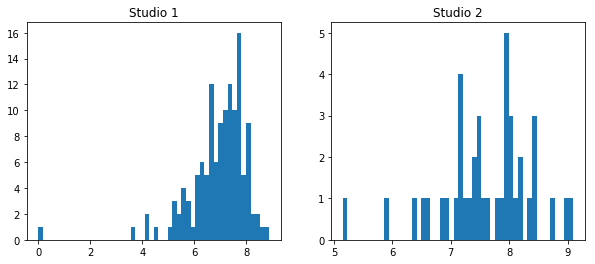

In [4]:
# your code here
from scipy import stats

studio1, studio2 = 'Studio Deen', 'Shaft'
studio1_anime = anime_arr[anime_arr[:,STUDIO] == anime_studios.index(studio1),:]
studio2_anime = anime_arr[anime_arr[:,STUDIO] == anime_studios.index(studio2),:]
sample_size = 25
sample1_inds = np.random.randint(studio1_anime.shape[0], size=sample_size)
sample2_inds = np.random.randint(studio2_anime.shape[0], size=sample_size)

scores1 = studio1_anime[sample1_inds, SCORE]
scores2 = studio2_anime[sample2_inds, SCORE]
t, p = stats.ttest_ind(scores1, scores2, equal_var=False)
print(p)

fig, axs = plt.subplots(1,2, figsize=(10,4))
axs[0].hist(studio1_anime[:,SCORE],bins=50)
axs[0].set_title('Studio 1')
axs[1].hist(studio2_anime[:,SCORE], bins=50)
axs[1].set_title('Studio 2')
plt.show()